### Boston 집값 예측 - tensorflow deeplearning

In [42]:
### x변수, y는 회귀분석으로서 1개의 출력값을 가짐
### 방 갯수, 범죄율, ... 이러한 x값들이 집값 y를 예측함

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.datasets import boston_housing

In [43]:
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
print(train_X.shape), train_Y
# 입력층은 무조건 input_shape=(13,)  -> train_X shape 확인 시  (404, 13) x 변수 13개이므로

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)), # 14*52
    #tf.keras.layers.Dense(units=39, activation='relu'),  # 53*39
    tf.keras.layers.Dense(units=26, activation='relu'),  # 40*26
    tf.keras.layers.Dense(units=1)  # 27*1
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

# Dense(10, input_shape=(13,)) w : 13개, b : 1개 -> 14*10
# Dense(1) 최종 dense는 1개

(404, 13)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 52)                728       
                                                                 
 dense_12 (Dense)            (None, 26)                1378      
                                                                 
 dense_13 (Dense)            (None, 1)                 27        
                                                                 
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
_________________________________________________________________


c:\Users\user\miniconda3\envs\gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [52]:
# 404개의 자료 중 20%를 검증용으로 떼어냄 - 약 81개 
# 404 - 31 = 323개
# 323개의 train 자료를 배치 32개씩 돌리면 323/32 = 총 11번의 w,b 갱신을 하고
# 에포크가 25번임으로 1에포크당 11번의 갱신을 25번 수행 => 25*11 = 총 275번의 w,b 갱신
history = model.fit(train_X, train_Y, epochs=250, batch_size=32, validation_split=0.2)

# val_loss가 실질적으로 중요함

Epoch 1/250
11/11 [==============================] - 0s 7ms/step - loss: 35.1801 - val_loss: 31.8212
Epoch 2/250
11/11 [==============================] - 0s 5ms/step - loss: 31.0216 - val_loss: 31.0669
Epoch 3/250
11/11 [==============================] - 0s 5ms/step - loss: 28.0252 - val_loss: 30.3978
Epoch 4/250
11/11 [==============================] - 0s 4ms/step - loss: 27.3549 - val_loss: 30.8575
Epoch 5/250
11/11 [==============================] - 0s 5ms/step - loss: 37.0916 - val_loss: 33.6586
Epoch 6/250
11/11 [==============================] - 0s 4ms/step - loss: 58.2125 - val_loss: 55.3619
Epoch 7/250
11/11 [==============================] - 0s 4ms/step - loss: 53.3768 - val_loss: 42.7070
Epoch 8/250
11/11 [==============================] - 0s 4ms/step - loss: 51.5435 - val_loss: 59.1081
Epoch 9/250
11/11 [==============================] - 0s 4ms/step - loss: 43.7287 - val_loss: 39.0495
Epoch 10/250
11/11 [==============================] - 0s 4ms/step - loss: 31.7274 - val_los

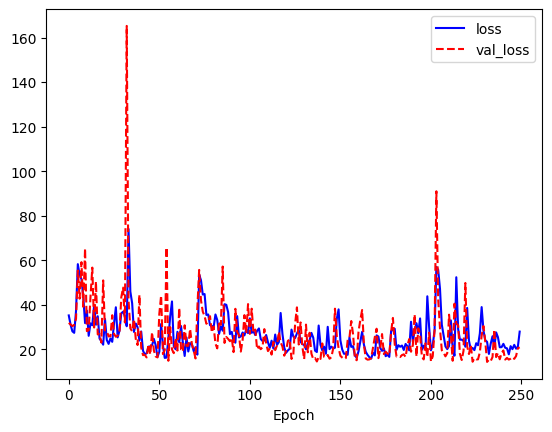

In [53]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

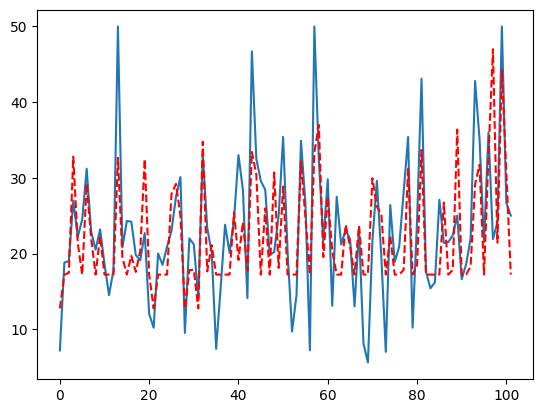

In [55]:
## 실제 y값하고 모델에서 예측하는 y값하고의 차이를 다시 한 번 비교 (test data를 이용해서)
yhat=model.predict(test_X) # 예측값
plt.plot(test_Y)
plt.plot(yhat,'r--')
# yhat

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 52)                728       
                                                                 
 dense_12 (Dense)            (None, 26)                1378      
                                                                 
 dense_13 (Dense)            (None, 1)                 27        
                                                                 
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.get_weights()[2].shape

(52, 26)

In [60]:
model.get_weights()[3].shape

(26,)

In [65]:
## 새로운 데이터로 모델에 넣어 예측
# 학습 시 사용한 x변수 13개이므로 새로운 x값도 13개 넣어야 함

newX=np.array([[1,2,1,1,2,1,1,1,1,3,1,1,1]])
model.predict(newX)

# 예상되는 집값 : 26.368694

array([[26.368694]], dtype=float32)